### [10 Minutes to Pandas Tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Allows multiple outputs for each cell

In [3]:
s = pd.Series([1, 2, 3, np.nan, 4, 5, np.nan])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
6    NaN
dtype: float64

Ways to create a DataFrame:

In [4]:
df = pd.DataFrame(np.random.randn(5, 3), index=[0, 2, 4, 6, 8], columns=['A', 'B', 'C'])
df

,A,B,C
0,-0.332934,-1.410316,0.281796
2,-0.273932,0.897443,2.089532
4,1.388579,-1.628510,0.340012
6,0.446879,0.552041,0.742875
8,0.688046,1.897371,-0.025633


In [5]:
df = pd.DataFrame({ 'A': 'foo',
                    'B': pd.Timestamp('20180322'),
                    'C': list('FGHIJ'),
                    'D': [2, 4, 6, 8, 10],
                    'E': np.array([0] * 5, dtype=float) })
df
df.dtypes

,A,B,C,D,E
0,foo,2018-03-22,F,2,0.0
1,foo,2018-03-22,G,4,0.0
2,foo,2018-03-22,H,6,0.0
3,foo,2018-03-22,I,8,0.0
4,foo,2018-03-22,J,10,0.0


A            object
B    datetime64[ns]
C            object
D             int64
E           float64
dtype: object

Accessing data: 

In [6]:
df.head() # Default is 5
df.tail(2)

,A,B,C,D,E
0,foo,2018-03-22,F,2,0.0
1,foo,2018-03-22,G,4,0.0
2,foo,2018-03-22,H,6,0.0
3,foo,2018-03-22,I,8,0.0
4,foo,2018-03-22,J,10,0.0


,A,B,C,D,E
3,foo,2018-03-22,I,8,0.0
4,foo,2018-03-22,J,10,0.0


In [7]:
df.index
df.columns
df.values

RangeIndex(start=0, stop=5, step=1)

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

array([['foo', Timestamp('2018-03-22 00:00:00'), 'F', 2, 0.0],
       ['foo', Timestamp('2018-03-22 00:00:00'), 'G', 4, 0.0],
       ['foo', Timestamp('2018-03-22 00:00:00'), 'H', 6, 0.0],
       ['foo', Timestamp('2018-03-22 00:00:00'), 'I', 8, 0.0],
       ['foo', Timestamp('2018-03-22 00:00:00'), 'J', 10, 0.0]],
      dtype=object)

In [8]:
df.describe() # Doesn't work on columns A-C, which aren't numerical

,D,E
count,5.000000,5.0
mean,6.000000,0.0
std,3.162278,0.0
min,2.000000,0.0
25%,4.000000,0.0
50%,6.000000,0.0
75%,8.000000,0.0
max,10.000000,0.0


In [9]:
df.T
df.T.index # Columns are now the indexes after transposing

,0,1,2,3,4
A,foo,foo,foo,foo,foo
B,2018-03-22 00:00:00,2018-03-22 00:00:00,2018-03-22 00:00:00,2018-03-22 00:00:00,2018-03-22 00:00:00
C,F,G,H,I,J
D,2,4,6,8,10
E,0,0,0,0,0


Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [10]:
df.sort_index(axis=1, ascending=False)
df.sort_index(axis=0, ascending=False)
# Axis: 0 -> rows, 1 -> columns
# df.mean(axis=0) would give the sum of the values in all rows for each column

,E,D,C,B,A
0,0.0,2,F,2018-03-22,foo
1,0.0,4,G,2018-03-22,foo
2,0.0,6,H,2018-03-22,foo
3,0.0,8,I,2018-03-22,foo
4,0.0,10,J,2018-03-22,foo


,A,B,C,D,E
4,foo,2018-03-22,J,10,0.0
3,foo,2018-03-22,I,8,0.0
2,foo,2018-03-22,H,6,0.0
1,foo,2018-03-22,G,4,0.0
0,foo,2018-03-22,F,2,0.0


In [11]:
df.sort_values(by='C', ascending=False)

,A,B,C,D,E
4,foo,2018-03-22,J,10,0.0
3,foo,2018-03-22,I,8,0.0
2,foo,2018-03-22,H,6,0.0
1,foo,2018-03-22,G,4,0.0
0,foo,2018-03-22,F,2,0.0


In [12]:
df['A'] # Returns a Series
df[1:4]

0    foo
1    foo
2    foo
3    foo
4    foo
Name: A, dtype: object

,A,B,C,D,E
1,foo,2018-03-22,G,4,0.0
2,foo,2018-03-22,H,6,0.0
3,foo,2018-03-22,I,8,0.0


In [13]:
df.loc[1] # Returns row at index 1 as a Series

A                    foo
B    2018-03-22 00:00:00
C                      G
D                      4
E                      0
Name: 1, dtype: object

In [14]:
df.loc[:, ['A', 'B']]
df.loc[1:3:2, :]
df.loc[2:3, 'C':'D']    # Both rows 2 and 3 and columns C and D are included
df.loc[4, ['A', 'B']]   # Returns a Series

,A,B
0,foo,2018-03-22
1,foo,2018-03-22
2,foo,2018-03-22
3,foo,2018-03-22
4,foo,2018-03-22


,A,B,C,D,E
1,foo,2018-03-22,G,4,0.0
3,foo,2018-03-22,I,8,0.0


,C,D
2,H,6
3,I,8


A                    foo
B    2018-03-22 00:00:00
Name: 4, dtype: object

In [15]:
df.loc[3, 'C'] # Both equivalent for getting a single value
df.at[3, 'C']  # This is faster, only works for scalar values

'I'

'I'

In [16]:
df.iloc[3, :]
df.iloc[:, 3]
df.iloc[2:4, 1:3] # Not inclusive on the ends, unlike loc
df.iloc[3, 3]
df.iat[3, 3]

A                    foo
B    2018-03-22 00:00:00
C                      I
D                      8
E                      0
Name: 3, dtype: object

0     2
1     4
2     6
3     8
4    10
Name: D, dtype: int64

,B,C
2,2018-03-22,H
3,2018-03-22,I


8

8

Boolean indexing: 

In [17]:
df[df > 3]
df[df.index % 2 == 0]
df[df.isin(['G', 'I', 'Z'])] # If cell contains one of the elements in the list

,A,B,C,D,E
0,foo,2018-03-22,F,NaN,NaN
1,foo,2018-03-22,G,4.0,NaN
2,foo,2018-03-22,H,6.0,NaN
3,foo,2018-03-22,I,8.0,NaN
4,foo,2018-03-22,J,10.0,NaN


,A,B,C,D,E
0,foo,2018-03-22,F,2,0.0
2,foo,2018-03-22,H,6,0.0
4,foo,2018-03-22,J,10,0.0


,A,B,C,D,E
0,NaN,NaT,NaN,NaN,NaN
1,NaN,NaT,G,NaN,NaN
2,NaN,NaT,NaN,NaN,NaN
3,NaN,NaT,I,NaN,NaN
4,NaN,NaT,NaN,NaN,NaN


Setting values: 

In [18]:
df['Z'] = np.random.randn(5)
df
df.at[4, 'Z'] = 100
df
df.loc[1:2, 'Z'] = np.array([1] * 2)
df

,A,B,C,D,E,Z
0,foo,2018-03-22,F,2,0.0,-0.255611
1,foo,2018-03-22,G,4,0.0,-0.534596
2,foo,2018-03-22,H,6,0.0,0.870239
3,foo,2018-03-22,I,8,0.0,0.291015
4,foo,2018-03-22,J,10,0.0,-0.135678


,A,B,C,D,E,Z
0,foo,2018-03-22,F,2,0.0,-0.255611
1,foo,2018-03-22,G,4,0.0,-0.534596
2,foo,2018-03-22,H,6,0.0,0.870239
3,foo,2018-03-22,I,8,0.0,0.291015
4,foo,2018-03-22,J,10,0.0,100.000000


,A,B,C,D,E,Z
0,foo,2018-03-22,F,2,0.0,-0.255611
1,foo,2018-03-22,G,4,0.0,1.000000
2,foo,2018-03-22,H,6,0.0,1.000000
3,foo,2018-03-22,I,8,0.0,0.291015
4,foo,2018-03-22,J,10,0.0,100.000000


In [19]:
s = pd.Series(['apple', 'bat', 'cat', 'dog'], index=[3, 2, 1, 0])
df['Y'] = s
df # Indexes of s automatically match with indexes of df

,A,B,C,D,E,Z,Y
0,foo,2018-03-22,F,2,0.0,-0.255611,dog
1,foo,2018-03-22,G,4,0.0,1.000000,cat
2,foo,2018-03-22,H,6,0.0,1.000000,bat
3,foo,2018-03-22,I,8,0.0,0.291015,apple
4,foo,2018-03-22,J,10,0.0,100.000000,NaN


In [20]:
df[df == 1] = np.nan # Can only set values to NaN with a mixed-type DataFrame with this code
df

,A,B,C,D,E,Z,Y
0,foo,2018-03-22,F,2,0.0,-0.255611,dog
1,foo,2018-03-22,G,4,0.0,NaN,cat
2,foo,2018-03-22,H,6,0.0,NaN,bat
3,foo,2018-03-22,I,8,0.0,0.291015,apple
4,foo,2018-03-22,J,10,0.0,100.000000,NaN


Missing data: 

In [21]:
df1 = df.reindex(index=df.index[0:3], columns=list(df.columns) + ['X'])
df1.loc[0:1, 'X'] = 5
df1
df1.dropna(how='any')           # Doesn't modify original
df1.dropna(how='any', axis=1)   # Drops columns instead of rows
df1['X'] = np.nan
df1.dropna(how='all', axis=1)

,A,B,C,D,E,Z,Y,X
0,foo,2018-03-22,F,2,0.0,-0.255611,dog,5.0
1,foo,2018-03-22,G,4,0.0,NaN,cat,5.0
2,foo,2018-03-22,H,6,0.0,NaN,bat,NaN


,A,B,C,D,E,Z,Y,X
0,foo,2018-03-22,F,2,0.0,-0.255611,dog,5.0


,A,B,C,D,E,Y
0,foo,2018-03-22,F,2,0.0,dog
1,foo,2018-03-22,G,4,0.0,cat
2,foo,2018-03-22,H,6,0.0,bat


,A,B,C,D,E,Z,Y
0,foo,2018-03-22,F,2,0.0,-0.255611,dog
1,foo,2018-03-22,G,4,0.0,NaN,cat
2,foo,2018-03-22,H,6,0.0,NaN,bat


In [22]:
pd.isna(df1)
df1.fillna(value='-99')

,A,B,C,D,E,Z,Y,X
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,True
2,False,False,False,False,False,True,False,True


,A,B,C,D,E,Z,Y,X
0,foo,2018-03-22,F,2,0.0,-0.255611,dog,-99
1,foo,2018-03-22,G,4,0.0,-99,cat,-99
2,foo,2018-03-22,H,6,0.0,-99,bat,-99


Operating on DataFrames: 

In [23]:
df = pd.DataFrame(np.random.randint(1000, size=(5, 5)), columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,730,9,477,700,927
1,556,88,985,305,980
2,845,388,705,569,162
3,903,13,159,393,425
4,768,629,749,977,385


In [24]:
df.mean() # Note: Stats usually don't include NaN values in their calculations
df.mean(axis=1)

A    760.4
B    225.4
C    615.0
D    588.8
E    575.8
dtype: float64

0    568.6
1    582.8
2    533.8
3    378.6
4    701.6
dtype: float64

In [25]:
df - 1000
df.sub([np.nan, 0, 0, 0, 1000]) # sub = subtract
df.sub([np.nan, 0, 0, 0, 1000], axis=0)

,A,B,C,D,E
0,-270,-991,-523,-300,-73
1,-444,-912,-15,-695,-20
2,-155,-612,-295,-431,-838
3,-97,-987,-841,-607,-575
4,-232,-371,-251,-23,-615


,A,B,C,D,E
0,NaN,9.0,477.0,700.0,-73.0
1,NaN,88.0,985.0,305.0,-20.0
2,NaN,388.0,705.0,569.0,-838.0
3,NaN,13.0,159.0,393.0,-575.0
4,NaN,629.0,749.0,977.0,-615.0


,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,556.0,88.0,985.0,305.0,980.0
2,845.0,388.0,705.0,569.0,162.0
3,903.0,13.0,159.0,393.0,425.0
4,-232.0,-371.0,-251.0,-23.0,-615.0


In [26]:
df.apply(np.mean)
df.apply(np.mean, axis=1)
df.apply(lambda x: x.max() - x.min())

A    760.4
B    225.4
C    615.0
D    588.8
E    575.8
dtype: float64

0    568.6
1    582.8
2    533.8
3    378.6
4    701.6
dtype: float64

A    347
B    620
C    826
D    672
E    818
dtype: int64

In [27]:
s = pd.Series(np.random.randint(5, 10, size=10))
s
s.value_counts()

0    6
1    9
2    9
3    5
4    9
5    6
6    8
7    6
8    8
9    8
dtype: int64

9    3
8    3
6    3
5    1
dtype: int64

Merging Series and DataFrames:

In [28]:
pd.concat([df[2:4], df[0:1], df[0:1]])
pd.concat([df.loc[:, 'C':'E'], df['B']], axis=1)

,A,B,C,D,E
2,845,388,705,569,162
3,903,13,159,393,425
0,730,9,477,700,927
0,730,9,477,700,927


,C,D,E,B
0,477,700,927,9
1,985,305,980,88
2,705,569,162,388
3,159,393,425,13
4,749,977,385,629


In [29]:
df1 = pd.DataFrame({'A': df['A'], 
                    'Z': [1, 10, 100, 1000, 10000] })
pd.merge(df, df1, on='A')

,A,B,C,D,E,Z
0,730,9,477,700,927,1
1,556,88,985,305,980,10
2,845,388,705,569,162,100
3,903,13,159,393,425,1000
4,768,629,749,977,385,10000


In [30]:
df1 = df.append(df.loc[0])
df1
df.append(pd.Series([1, 2, 3, 4, 5], index=df.columns), ignore_index=True)

,A,B,C,D,E
0,730,9,477,700,927
1,556,88,985,305,980
2,845,388,705,569,162
3,903,13,159,393,425
4,768,629,749,977,385
0,730,9,477,700,927


,A,B,C,D,E
0,730,9,477,700,927
1,556,88,985,305,980
2,845,388,705,569,162
3,903,13,159,393,425
4,768,629,749,977,385
5,1,2,3,4,5


In [31]:
df1.groupby('A').sum() # Groups together A column's two 747 values
df1 = df1.append(df[2:3], ignore_index=True)
df1.loc[6,'B':] += 100
df1.groupby(['A', 'B']).sum() # Groups together by both A and B

,B,C,D,E
A,,,,
556,88,985,305,980
730,18,954,1400,1854
768,629,749,977,385
845,388,705,569,162
903,13,159,393,425


C     D     E
A   B                   
556 88   985   305   980
730 9    954  1400  1854
768 629  749   977   385
845 388  705   569   162
    488  805   669   262
903 13   159   393   425

Pivot Tables: 

In [32]:
df = df.append(pd.Series(np.random.randint(1000, size=5), index=df.columns), ignore_index=True)
df['X'] = ['foo', 'bar'] * 3
df['Y'] = ['aa', 'bb', 'cc'] * 2
df

,A,B,C,D,E,X,Y
0,730,9,477,700,927,foo,aa
1,556,88,985,305,980,bar,bb
2,845,388,705,569,162,foo,cc
3,903,13,159,393,425,bar,aa
4,768,629,749,977,385,foo,bb
5,300,600,60,840,562,bar,cc


In [33]:
pd.pivot_table(df, values='A', index='X', columns='D')
pd.pivot_table(df, values='A', index=['X', 'Y'])
pd.pivot_table(df, values='A', index=['X', 'Y'], columns='D')

D,305,393,569,700,840,977
X,,,,,,
bar,556.0,903.0,NaN,NaN,300.0,NaN
foo,NaN,NaN,845.0,730.0,NaN,768.0


A
X   Y      
bar aa  903
    bb  556
    cc  300
foo aa  730
    bb  768
    cc  845

D         305    393    569    700    840    977
X   Y                                           
bar aa    NaN  903.0    NaN    NaN    NaN    NaN
    bb  556.0    NaN    NaN    NaN    NaN    NaN
    cc    NaN    NaN    NaN    NaN  300.0    NaN
foo aa    NaN    NaN    NaN  730.0    NaN    NaN
    bb    NaN    NaN    NaN    NaN    NaN  768.0
    cc    NaN    NaN  845.0    NaN    NaN    NaN

Time Series: 

In [34]:
rng = pd.date_range('3/24/2018', periods=120, freq='S')
s = pd.Series(np.random.randint(100, size=len(rng)), index=rng)
s.head()
s.resample('1Min').sum()
s.resample('Min').max()
s.resample('30S').min()
s.resample('1D').sum()

2018-03-24 00:00:00    69
2018-03-24 00:00:01    60
2018-03-24 00:00:02    28
2018-03-24 00:00:03    77
2018-03-24 00:00:04    87
Freq: S, dtype: int64

2018-03-24 00:00:00    3229
2018-03-24 00:01:00    3380
Freq: T, dtype: int64

2018-03-24 00:00:00    99
2018-03-24 00:01:00    97
Freq: T, dtype: int64

2018-03-24 00:00:00     0
2018-03-24 00:00:30     3
2018-03-24 00:01:00    11
2018-03-24 00:01:30    17
Freq: 30S, dtype: int64

2018-03-24    6609
Freq: D, dtype: int64

In [35]:
s_utc = s.tz_localize('UTC')
s_utc.head()
s_pst = s_utc.tz_convert('US/Pacific')
s_pst.head()

2018-03-24 00:00:00+00:00    69
2018-03-24 00:00:01+00:00    60
2018-03-24 00:00:02+00:00    28
2018-03-24 00:00:03+00:00    77
2018-03-24 00:00:04+00:00    87
Freq: S, dtype: int64

2018-03-23 17:00:00-07:00    69
2018-03-23 17:00:01-07:00    60
2018-03-23 17:00:02-07:00    28
2018-03-23 17:00:03-07:00    77
2018-03-23 17:00:04-07:00    87
Freq: S, dtype: int64

Timestamps and Periods:

In [36]:
rng = pd.date_range('1/1/2000', periods=6, freq='M')
s = pd.Series(np.random.randint(10, size=len(rng)), index=rng)
ps = s.to_period()
ps
ps.to_timestamp()
# Period is an interval, timestamp is a point in time

2000-01    4
2000-02    0
2000-03    2
2000-04    2
2000-05    3
2000-06    5
Freq: M, dtype: int64

2000-01-01    4
2000-02-01    0
2000-03-01    2
2000-04-01    2
2000-05-01    3
2000-06-01    5
Freq: MS, dtype: int64

Categoricals:

In [37]:
df = pd.DataFrame({'id': list(range(7)), 
                   'raw_grade': ['a', 'b', 'c', 'a', 'd', 'e', 'd']})
df['grade'] = df['raw_grade'].astype('category')
df['grade']
df['grade'].cat.categories = ['Excellent', 'Good', 'Okay', 'Bad', 'Horrible']
df['grade']
df.sort_values(by='grade')
df.groupby('grade').size()

0    a
1    b
2    c
3    a
4    d
5    e
6    d
Name: grade, dtype: category
Categories (5, object): [a, b, c, d, e]

0    Excellent
1         Good
2         Okay
3    Excellent
4          Bad
5     Horrible
6          Bad
Name: grade, dtype: category
Categories (5, object): [Excellent, Good, Okay, Bad, Horrible]

,id,raw_grade,grade
0,0,a,Excellent
3,3,a,Excellent
1,1,b,Good
2,2,c,Okay
4,4,d,Bad
6,6,d,Bad
5,5,e,Horrible


grade
Excellent    2
Good         1
Okay         1
Bad          2
Horrible     1
dtype: int64

Plotting: 

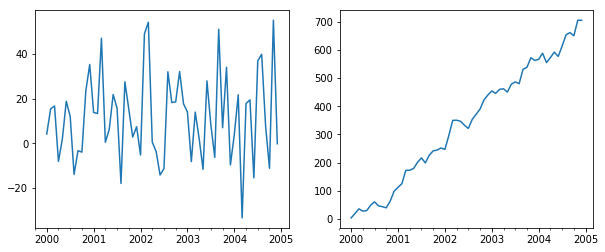

In [38]:
rng = pd.date_range('1/1/2000', periods=60, freq='M')
s = pd.Series(np.random.normal(10, 20, size=len(rng)), index=rng)
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(121)
s.plot()
fig.add_subplot(122)
s.cumsum().plot()

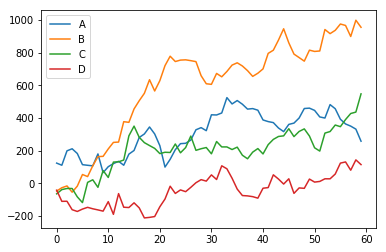

In [39]:
df = pd.DataFrame(np.random.normal(5, 50, size=(60, 4)), columns=['A', 'B', 'C', 'D'])
fig = plt.figure()
df.cumsum().plot()

Working with CSV files:

In [40]:
df.to_csv('pandas.csv')

In [41]:
df = pd.read_csv('pandas.csv')
df.head()

,Unnamed: 0,A,B,C,D
0,0,123.945020,-46.930687,-64.084111,-41.688691
1,1,-13.008175,20.131419,25.868859,-68.303297
2,2,88.177183,11.085368,6.926165,0.558404
3,3,12.548250,-38.392222,-0.078105,-51.657060
4,4,-28.907035,37.149109,-51.138470,-10.853848
